# Load and Plot EMNIST Letters Data

Michael Madden, Feb 2026. 

This loads a file callsed emnist_letters_train.npz" with letters data, already transposed and scaled.

Note that the images as displayed are quite fuzzy looking, because they are low res (28x28).

The labels from 1 to 26, where 1=A and 26=Z. Cases include mix of uppercase and lowercase with the same label.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.load("emnist_letters_85800.npz")

x_data = data["x"]
y_data = data["y"]

In [4]:
# Do some data checks ...

# Check how many different classes we have: should be 26
n_classes =len(np.unique(y_data))
print(f"The number of unique classes is {n_classes} (should be 26).")

# check that images are scaled: min should be 0, max should be 1
img = x_data[0]
print(f"\nFor a single image, the min value is {img.min()} and the max is {img.max()} (should be 0.0 and 1.0).")

# Check the shape of the two classes
print(f"\nShape of x_data is {x_data.shape}, shape of y_data is {y_data.shape} (should have 85,800 cases and x should be 28x28).")

The number of unique classes is 26 (should be 26).

For a single image, the min value is 0.0 and the max is 1.0 (should be 0.0 and 1.0).

Shape of x_data is (85800, 28, 28, 1), shape of y_data is (85800,) (should have 85,800 cases and x should be 28x28).


In [5]:
# Plot the first image
# Dont need this 
# plt.imshow(x_data[0].squeeze(), cmap="gray")
# plt.title(chr(int(y_data[0]) + 64))  
# plt.show()

In [6]:
# Plot one item per class
n = 1000  # plot the n-th item, starting from 0

# Dont need this 
# Get unique labels
# classes = np.unique(y_data)

# plt.figure(figsize=(12, 6))

# for i, cls in enumerate(classes):
#     # Find first index of this class
#     idx = np.where(y_data == cls)[0][n]
    
#     plt.subplot(4, 7, i + 1)
#     plt.imshow(x_data[idx].squeeze(), cmap="gray")
#     plt.title(chr(int(cls) + 64))  # 1->A, 2->B, ...
#     plt.axis("off")

# plt.tight_layout()
# plt.show()

In [7]:
# Extract just two classes from the dataset

# PUT YOUR OWN CLASS NUMBERS HERE: remember that A=1, z=26.
c1 = 8   # example
c2 = 11  # example

mask = (y_data == c1) | (y_data == c2)

x_binary = x_data[mask]
y_binary = y_data[mask]

# Now change labels to 0 and 1
y_binary = (y_binary == c2).astype(int)

In [8]:
# To help you examine your data, here is a graph to plot 48  images in a grid, starting from an index you specify.

def plot_grid(x, y, n):
    plt.figure(figsize=(5, 5))
    
    for i in range(48):
        idx = n + i
        
        plt.subplot(6, 8, i + 1)
        plt.imshow(x[idx].squeeze(), cmap="gray")
        plt.title(int(y[idx]))
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

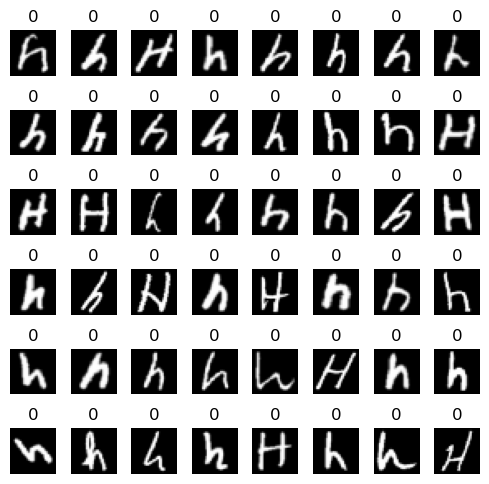

In [9]:
# Let's check images at the start - will all have label 0

plot_grid(x_binary, y_binary, n=0)

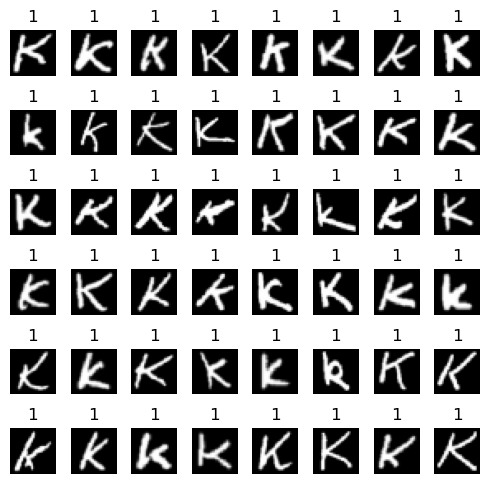

In [10]:
# Now check images after 3300 - will all have label 1

plot_grid(x_binary, y_binary, n=3300)

In [11]:
#flattening images 
m = x_binary.shape[0]
X = x_binary.reshape(m,-1)
y = y_binary.reshape(-1,1)
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (6600, 784)
y shape: (6600, 1)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, shuffle=True)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (4620, 784)
Validation: (990, 784)
Test: (990, 784)


In [ ]:
class LogisticRegressor:
    def __init__(self, alpha=0.01, max_iters=100000, threshold=1e-6, N=1000,hidden_layers=1, hidden_layer_size=3, seed=42):
        self.alpha = alpha
        self.max_iters = max_iters
        self.threshold = threshold
        self.N = N
        self.hidden_layers = hidden_layers
        self.hidden_layer_size = hidden_layer_size # not sure what to do with this. 
        self.seed = seed
        self.loss_history = []
        self.accuracy_history = []
        self.trained = False #to be used in predict
        


    def sigmoid(self, t):
        return 1/(1 + np.exp(-t))

    #def relu(self, z):
        #return np.maximum(0, z)

    #def relu_derivative(self, z):
        #return (z > 0).astype(float)
    
    def loss_function(self, y, y_cap):
        epsilon = np.finfo(float).eps
        y_cap = np.clip(y_cap, epsilon, 1 - epsilon)
        return -(y * np.log(y_cap) + (1 - y) * np.log(1 - y_cap))
    
    def fit(self, X, Y):
        np.random.seed(self.seed)
        self.loss_history = []
        self.accuracy_history = []

        
        m = X.shape[0] # samples
        n = X.shape[1] # features

        #init weights and bias
        W1 = np.random.randn(self.hidden_layer_size,n) * 0.01 #random values with mean=0, stdev=0.01 ?
        b1 = np.zeros((self.hidden_layer_size,1))

        W2 = np. random.randn(1,self.hidden_layer_size) * 0.01 
        b2 = np.zeros((1, 1))

        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)


        stopping = False; loss_prev = 0; iteration = 0; acc = 0
        

        while not stopping:
            #select random data point
            
            i = np.random.choice(np.arange(m))  # pick a random index
            x = X[i].reshape(-1,1)
            y = Y[i, 0]

            #forward pass
            a1 = self.sigmoid(W1 @ x + b1)
            y_cap = (self.sigmoid(W2 @ a1 + b2)).item()
            
            
            loss = self.loss_function(y, y_cap)
            self.loss_history.append(float(loss))
            
            #back propagation
            #output layer
            deltaz = y_cap - y
            delW2 = deltaz @ a1.T
            delb2 = deltaz
            #hidden layer
            deltaz1 = (W2.T * deltaz) * (a1 * (1 - a1))
            delW1 = deltaz1 @ x.T    # gradient of hidden weights
            delb1 = deltaz1           # gradient of hidden biases

            #stochatic gradient descent
            W1 = W1 - self.alpha * delW1
            b1 = b1 - self.alpha * delb1
            W2 = W2 - self.alpha * delW2
            b2 = b2 - self.alpha * delb2

            #to store accuracy per iteration
            pred_i = 1 if y_cap >= 0.5 else 0
            self.accuracy_history.append(1.0 if pred_i == y else 0.0)

        
            loss_prev = loss
            iteration += 1
            if iteration >= self.max_iters:
                stopping = True

        #set weights here
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.trained = True

    def predict(self,x):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")
        
        #change here
        a1 = self.sigmoid(self.W1 @ x.T + self.b1)
        y_prob = self.sigmoid(self.W2 @ a1 + self.b2)

        Y_pred = (y_prob >= 0.5).astype(int)
        return Y_pred
    
    def score(self, x_test, y_test):
        if (self.trained == False):
            raise ValueError("Not trained uyet!")        
        
        y_pred = self.predict(x_test)
        #running into shape issues so trying this 
        y_pred = y_pred.flatten()
        y_test = y_test.flatten()
        correct = 0
        size = len(y_test)

        for i in range(size):
            if (y_pred[i]==y_test[i]):
                correct+=1

        return correct/size
    

In [14]:
lr = LogisticRegressor(alpha=0.01, max_iters=100000, threshold=1e-6, N=1000, hidden_layers=1, hidden_layer_size= 10)

In [15]:
lr.fit(X_train, y_train)

In [16]:
learning_rates = [ 0.01, 0.05, 0.1, 0.5, 1.0, 5.0]
hidden_sizes = [3, 5, 10, 20]
max_iters_list = [15000, 25000, 50000]

results = []
best_model = None
best_acc = -np.inf

for lr in learning_rates:
    for hidden in hidden_sizes:
        for iters in max_iters_list:
            
            model = LogisticRegressor(alpha=lr, max_iters=iters, hidden_layer_size=hidden)
            
            model.fit(X_train, y_train)
            acc = model.score(X_val, y_val) 
            results.append({
                'alpha': lr,
                'hidden_size': hidden,
                'max_iters': iters,
                'val_acc': acc
            })

            if acc > best_acc:
                best_acc = acc
                best_model = model

            print(f"lr={lr}, hidden={hidden}, iters={iters} --> val_acc={acc:.4f}")


best_hyper = max(results, key=lambda x: x['val_acc'])
print("best hyperparameters:", best_hyper)

lr=0.01, hidden=3, iters=15000 --> val_acc=0.9111
lr=0.01, hidden=3, iters=25000 --> val_acc=0.9212
lr=0.01, hidden=3, iters=50000 --> val_acc=0.9152
lr=0.01, hidden=5, iters=15000 --> val_acc=0.9172
lr=0.01, hidden=5, iters=25000 --> val_acc=0.9313
lr=0.01, hidden=5, iters=50000 --> val_acc=0.9434
lr=0.01, hidden=10, iters=15000 --> val_acc=0.9111
lr=0.01, hidden=10, iters=25000 --> val_acc=0.9242
lr=0.01, hidden=10, iters=50000 --> val_acc=0.9455
lr=0.01, hidden=20, iters=15000 --> val_acc=0.9172
lr=0.01, hidden=20, iters=25000 --> val_acc=0.9192
lr=0.01, hidden=20, iters=50000 --> val_acc=0.9475
lr=0.05, hidden=3, iters=15000 --> val_acc=0.8889
lr=0.05, hidden=3, iters=25000 --> val_acc=0.9101
lr=0.05, hidden=3, iters=50000 --> val_acc=0.9253
lr=0.05, hidden=5, iters=15000 --> val_acc=0.9343
lr=0.05, hidden=5, iters=25000 --> val_acc=0.9485
lr=0.05, hidden=5, iters=50000 --> val_acc=0.9455
lr=0.05, hidden=10, iters=15000 --> val_acc=0.9556
lr=0.05, hidden=10, iters=25000 --> val_acc

In [20]:
best_model.score(X_test, y_test)

0.9707070707070707

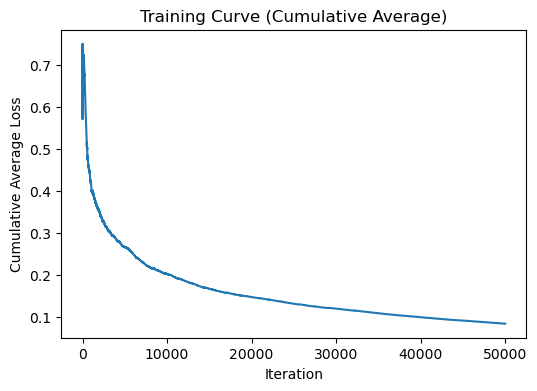

In [ ]:
import numpy as np

loss_array = np.array(best_model.loss_history)
cumulative_avg = np.cumsum(loss_array) / np.arange(1, len(loss_array)+1)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumulative_avg)
plt.xlabel("Iteration")
plt.ylabel("Cumulative Loss")
plt.title("Training Curve")
plt.show()



In [28]:
print(type(best_model.loss_history))
print(type(best_model.loss_history[0]))
print(np.shape(best_model.loss_history[0]))


<class 'list'>
<class 'float'>
()
